# Import Library

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Import Data Set

In [18]:
#////////////////////////////////////////////////////////////#
# Import data
#////////////////////////////////////////////////////////////#

data_import = pd.read_csv('E:\Jupyter notebook\Covid EDA\owid-covid-data.csv')
data_import.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [19]:
df=data_import.copy()
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


# Data Cleaning

In [31]:
# check columns
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [32]:
# create df with cases and vaccination data over time
df = df[[
    'iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
     'total_deaths', 'new_deaths','total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'new_vaccinations','population',
]]
df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172794,ZWE,Africa,Zimbabwe,2022-03-25,245645.0,451.0,5436.0,4.0,8691642.0,4814582.0,3473523.0,139213.0,15092171.0
172795,ZWE,Africa,Zimbabwe,2022-03-26,245645.0,0.0,5436.0,0.0,8791728.0,4886242.0,3487962.0,100086.0,15092171.0
172796,ZWE,Africa,Zimbabwe,2022-03-27,245820.0,175.0,5438.0,2.0,8845039.0,4918147.0,3493763.0,53311.0,15092171.0
172797,ZWE,Africa,Zimbabwe,2022-03-28,245927.0,107.0,5438.0,0.0,8934360.0,4975433.0,3501493.0,89321.0,15092171.0


In [33]:
# datetime, dtypes, etc

#formate date to datetime
df['date'] = pd.to_datetime(df['date'])
df['date']

0        2020-02-24
1        2020-02-25
2        2020-02-26
3        2020-02-27
4        2020-02-28
            ...    
172794   2022-03-25
172795   2022-03-26
172796   2022-03-27
172797   2022-03-28
172798   2022-03-29
Name: date, Length: 172799, dtype: datetime64[ns]

# Univariate Analysis
## common Data Types

In [34]:
#////////////////////////////////////////////////////////////#
# Data Types
#////////////////////////////////////////////////////////////#
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'new_vaccinations', 'population'],
      dtype='object')

<AxesSubplot:>

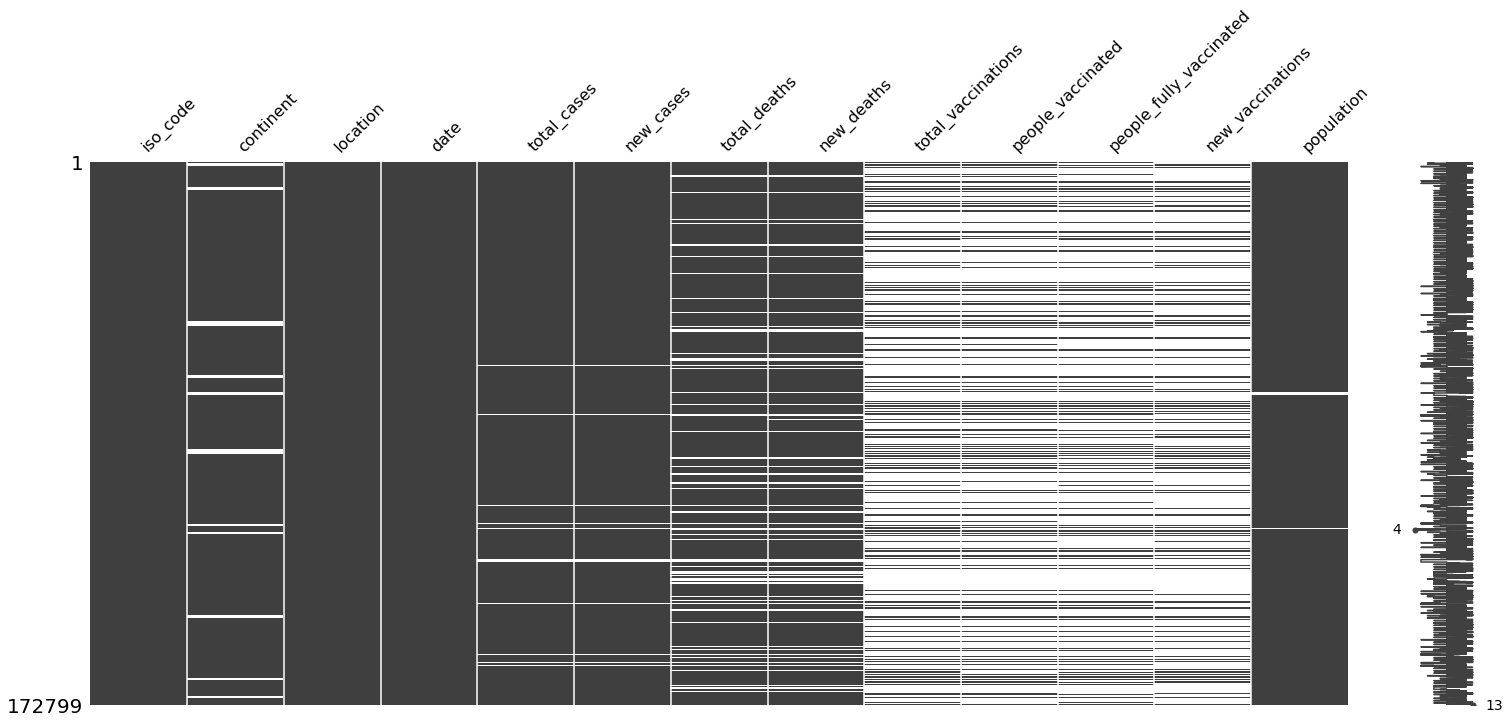

In [37]:
#////////////////////////////////////////////////////////////#
# Missing Values
#////////////////////////////////////////////////////////////#

msno.matrix(df)

<AxesSubplot:>

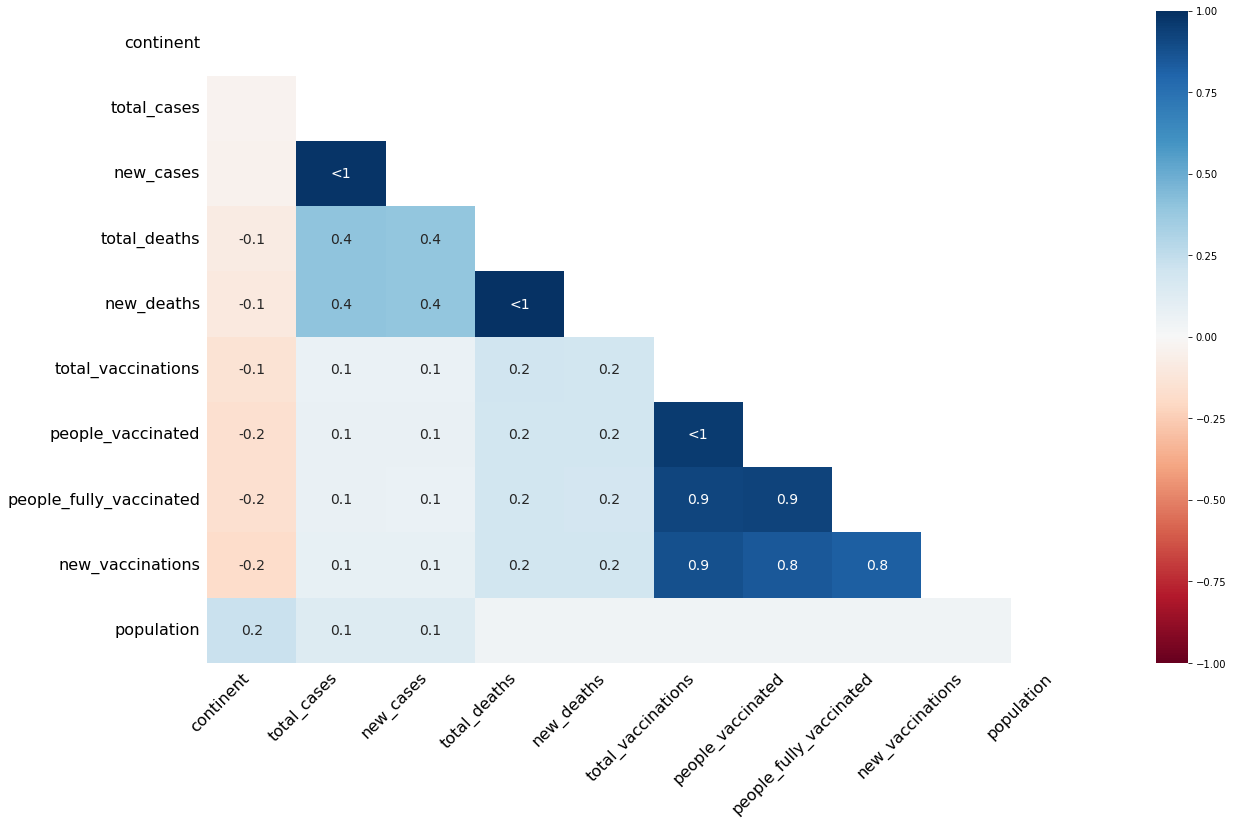

In [38]:
#////////////////////////////////////////////////////////////#
# Missing Values Heatmap
#////////////////////////////////////////////////////////////#
msno.heatmap(df)

## Numerical Data Types

In [41]:
#////////////////////////////////////////////////////////////#
# Quantile / Descriptive Statistics
#////////////////////////////////////////////////////////////#

df.describe()/1000000

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population
count,0.168765,0.168597,0.150725,0.150738,0.047382,0.045069,0.042397,0.039150,0.171700
mean,2.735411,0.012222,0.059673,0.000169,186.358987,94.033661,75.375414,1.159470,146.342932
std,16.867780,0.087999,0.312306,0.000823,832.453283,420.189915,351.854949,4.310103,702.884617
min,0.000001,0.000000,0.000001,0.000000,0.000000,0.000000,0.000001,0.000000,0.000047
25%,0.002174,0.000001,0.000083,0.000000,0.648138,0.403710,0.292063,0.006040,1.172369
50%,0.028825,0.000079,0.000818,0.000002,5.166324,3.176748,2.534299,0.040822,8.141343
75%,0.319686,0.001076,0.007611,0.000019,32.851435,18.766646,14.815845,0.276794,33.359415
max,484.968947,4.089042,6.133051,0.018156,11242.473625,5071.143255,4542.644431,54.496698,7874.965730


In [48]:
df.groupby(['continent','location']).sum()/1000000

total_cases  new_cases  total_deaths  new_deaths  \
continent     location                                                         
Africa        Algeria         89.912324   0.265651      2.528264    0.006874   
              Angola          24.640185   0.099138      0.571094    0.001903   
              Benin            7.407032   0.027161      0.062678    0.000163   
              Botswana        60.078553   0.263950      0.718164    0.002619   
              Burkina Faso     7.170512   0.020853      0.112379    0.000382   
...                                 ...        ...           ...         ...   
South America Paraguay       186.744931   0.647950      5.637046    0.018664   
              Peru          1106.958919   3.545628     96.278678    0.212866   
              Suriname        16.323794   0.079188      0.333256    0.001324   
              Uruguay        162.844092   0.886001      2.072977    0.007156   
              Venezuela      155.215951   0.520169      1.733992    0.005686   

                            total_vaccinations  people_vaccinated  \
continent     location                                              
Africa        Algeria               238.946062         136.020513   
              Angola                388.740243         249.887443   
              Benin                  24.937864          22.995631   
              Botswana               25.047730          21.442026   
              Burkina Faso           18.752087          16.373596   
...                                        ...                ...   
South America Paraguay              423.464599         257.747681   
              Peru                10520.125027        5336.745515   
              Suriname               69.986069          42.452518   
              Uruguay              1979.930902         889.650678   
              Venezuela             422.856844         252.080543   

                            people_fully_vaccinated  new_vaccinations  \
continent     location                                                  
Africa        Algeria                     98.696382          0.170786   
              Angola                     124.201062          0.000000   
              Benin                       17.840187          0.000000   
              Botswana                    14.219777          0.010435   
              Burkina Faso                 9.969480          0.000000   
...                                             ...               ...   
South America Paraguay                   138.667461          4.105501   
              Peru                      4356.516952         65.552882   
              Suriname                    27.286389          0.343344   
              Uruguay                    774.921998          8.027368   
              Venezuela                  156.938493          0.000000   

                              population  
continent     location                    
Africa        Algeria       34087.102264  
              Angola        25110.872140  
              Benin          9263.567064  
              Botswana       1749.985200  
              Burkina Faso  16122.822750  
...                                  ...  
South America Paraguay       5436.389673  
              Peru          25152.998910  
              Suriname        441.481308  
              Uruguay        2603.408544  
              Venezuela     21413.890462  

[226 rows x 9 columns]

In [ ]:
#////////////////////////////////////////////////////////////#
# violin plot of data
#////////////////////////////////////////////////////////////#

px.violin(
    data_import,
    x="Days In Top 10",
    box=True,
    points='all'
)

In [ ]:
data_import[data_import['Days In Top 10']==data_import['Days In Top 10'].max()]
agg_df = data_import.groupby("Title").max().sort_values(by='Days In Top 10', ascending=False)
agg_df

In [ ]:
#////////////////////////////////////////////////////////////#
# violin plot of aggregated data
#////////////////////////////////////////////////////////////#
px.violin(
    agg_df,
    x="Days In Top 10",
    box=True,
    points='all'
)

In [ ]:
#////#
#Histogram and Violin plot
#////#
px.histogram(
    agg_df,
    x="Days In Top 10",
    nbins=1000,
    marginal='violin',
    range_x=[0,agg_df['Days In Top 10'].max()]
)

In [ ]:
plt.figure(figsize=[15,9])
sns.histplot(data=agg_df,x='Days In Top 10',hue='Type')

## Categorical Data Types

In [ ]:
#////////////////////////////////////////////////////////////#
# Cardinality / Unique Counts
#////////////////////////////////////////////////////////////#

def cardinality_pareto(dataframe, column):
    temp = dataframe[column].value_counts().reset_index()
    temp['PercentOfTotal'] = temp[column] / temp[column].sum()
    temp['PercentRunningTotal'] = temp["PercentOfTotal"].cumsum()
    return temp

cardinality_pareto(agg_df,"Type")

In [ ]:
agg_df

In [ ]:
agg_df['Year'] = agg_df['Netflix Release Date'].str[-4:]
cardinality_pareto(agg_df,"Year")

In [ ]:
agg_df['Netflix Exclusive'] = agg_df['Netflix Exclusive'].fillna(value='No')
agg_df

In [ ]:
plt.figure(figsize=[15,9])
sns.scatterplot(data=agg_df.head(100),x='Title',y='Days In Top 10',hue='Netflix Exclusive')

In [ ]:
cardinality_pareto(agg_df,"Netflix Exclusive")

In [ ]:
plt.figure(figsize=[15,9])
sns.histplot(data=agg_df,x='Days In Top 10',hue='Netflix Exclusive')

# Textual Analysis

In [ ]:
#////////////////////////////////////////////////////////////#
# Tokens
#////////////////////////////////////////////////////////////#

In [ ]:
#////////////////////////////////////////////////////////////#
# TF / DF
#////////////////////////////////////////////////////////////#

# Date Data Types

In [ ]:
#////////////////////////////////////////////////////////////#
# Histogram
#////////////////////////////////////////////////////////////#
agg_df['As of'] = pd.to_datetime(agg_df['As of'])
agg_df['Netflix Release Date'] = pd.to_datetime(agg_df['Netflix Release Date'])

In [ ]:
agg_df['Month']= agg_df['Netflix Release Date'].dt.month
agg_df

In [ ]:
agg_df['Year'] = agg_df['Year'].astype('int64')
agg_df['Year']

In [ ]:
agg_df.groupby('Month').count().reset_index()#.hist()
fig = px.histogram(x = agg_df['Month'])
fig.update_layout(bargap=0.2)

In [ ]:
agg_df.groupby('Month').mean().reset_index()#.hist()

In [ ]:
# How release month affect Days in Top 10
# 
px.bar(data_frame=agg_df.groupby('Month').mean().reset_index(),x='Month',y='Days In Top 10')
px.bar(data_frame=agg_df,x='Month',y='Days In Top 10')

In [ ]:
# How release Year affect Days in Top 10
# 
px.bar(data_frame=agg_df.groupby('Year').mean().reset_index(),x='Year',y='Days In Top 10')
px.bar(data_frame=agg_df,x='Year',y='Days In Top 10')

# Bivariate Analysis

## Correlation Analysis

In [ ]:
#////////////////////////////////////////////////////////////#
# Qualitative Analysis
#////////////////////////////////////////////////////////////#

# Contingency Tables
agg_df
pd.crosstab(agg_df['Days In Top 10'],agg_df['Type'],margins=False)

In [ ]:
#////////////////////////////////////////////////////////////#
# Qualitative Analysis
#////////////////////////////////////////////////////////////#

# correlation between month and the Type
pd.crosstab(agg_df['Days In Top 10'],agg_df['Type'],margins=False).corr()

In [ ]:
# find correlation for each items

corr = pd.get_dummies(agg_df[['Days In Top 10','Type']]).corr()

mask = np.triu(np.ones_like(corr,dtype=bool))

f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data=corr,mask=mask,center=0,square=True,lw=0.5,cbar_kws={"shrink":.5},annot=True)

In [ ]:
group_by_Type = pd.get_dummies(agg_df[['Days In Top 10','Type','Netflix Exclusive']]).reset_index().corr()
mask = np.triu(np.ones_like(group_by_Type,dtype=bool))

f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data=group_by_Type,mask=mask,center=0,square=True,lw=0.5,cbar_kws={"shrink":.5},annot=True)


In [ ]:
# Change data type to find corr by attributes
agg_df[['Days In Top 10','Type','Netflix Exclusive']].corr()

In [ ]:
cat_df = agg_df.copy()
cat_df['Netflix Exclusive']=agg_df['Netflix Exclusive']=='Yes'
cat_df['Type']=cat_df['Type'].astype('category').cat.codes


In [ ]:
cat_df[['Netflix Exclusive','Type','Days In Top 10']].corr()

In [ ]:
group_by_Type = pd.get_dummies(cat_df[['Days In Top 10','Type','Netflix Exclusive']]).reset_index().corr()
group_by_Type
mask = np.triu(np.ones_like(group_by_Type,dtype=bool))

f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data=group_by_Type,mask=mask,center=0,square=True,lw=0.5,cbar_kws={"shrink":.5},annot=True)

In [ ]:
pd.crosstab(agg_df['Netflix Exclusive'],agg_df['Type'],margins=False)
pd.crosstab(agg_df['Netflix Exclusive'],agg_df['Type'],margins=False,normalize=True)
pd.crosstab(agg_df['Netflix Exclusive'],agg_df['Type'],margins=False,normalize='index')
pd.crosstab(agg_df['Netflix Exclusive'],agg_df['Type'],margins=False,normalize='columns')

### Use of Scipy to see the indenpendence relationship

In [ ]:
for i in agg_df['Type'].unique():
    temp = agg_df.copy()
    temp['TempType']= agg_df['Type'].apply(
        lambda x:i if x== i else f"Not{i}"
    )

    temp_crosstab = pd.crosstab(
        temp['TempType'],agg_df['Netflix Exclusive'], margins = False
    )

    c, p, dof, expected = chi2_contingency(temp_crosstab)

    p = round(p,2)

    if p == 1.0:
        print(f'not enough info for {i}')
    elif p<0.05:
        print(f'{i} and Netflix Exclusive ARE Indenpendent')
    else:
        print(f'{i} and Netflix Exclusive are NOT indenpendent')
